In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [26]:
df = pd.read_csv("./csv/votersdata.csv")
RSEED = 123
pd.set_option('display.max_columns', 7)

<Axes: xlabel='status'>

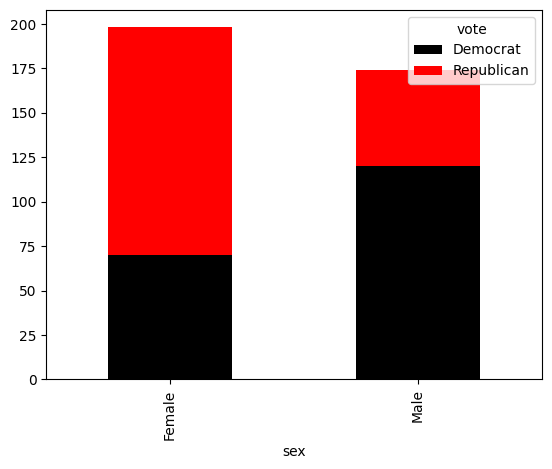

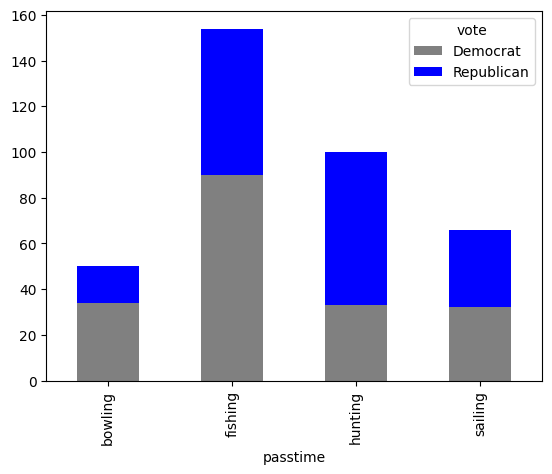

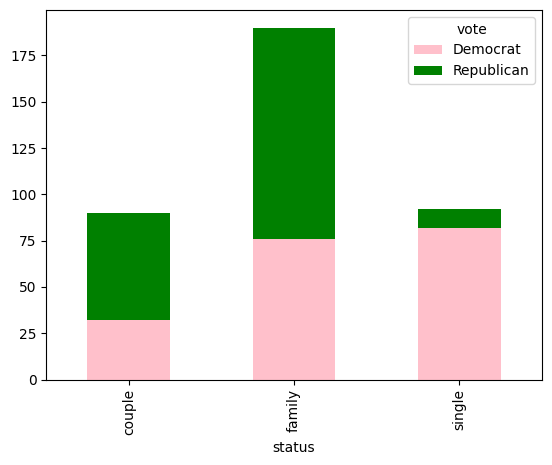

In [27]:
# Crosstabing with vote for each categorial feature:
df_stacked_sex = pd.crosstab(df['sex'], df['vote'])
df_stacked_passtime = pd.crosstab(df['passtime'], df['vote'])
df_stacked_status = pd.crosstab(df['status'], df['vote'])
df_stacked_sex.plot.bar(stacked=True, color = ['black','red'])
df_stacked_passtime.plot.bar(stacked=True, color = ['grey','blue'])
df_stacked_status.plot.bar(stacked=True, color = ['pink','green'])

<Axes: title={'center': 'age'}, xlabel='vote'>

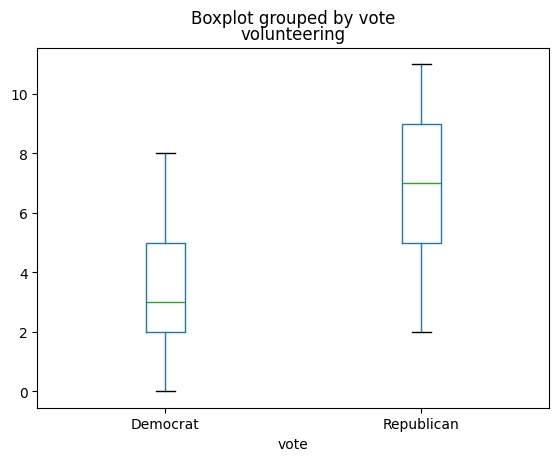

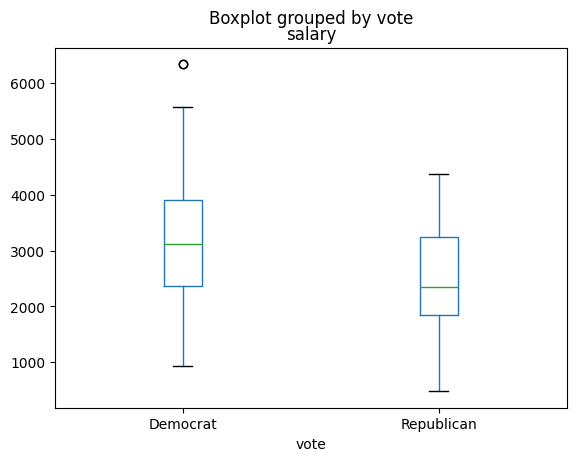

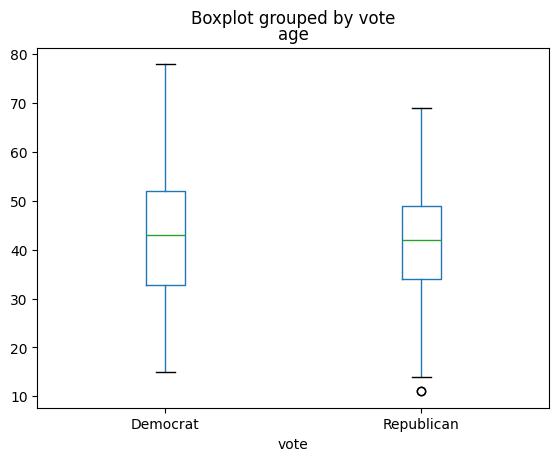

In [28]:
# Crosstabing with vote for each numerical feature:
df.boxplot(column=['volunteering'], by='vote', grid=False)
df.boxplot(column=['salary'], by='vote', grid=False)
df.boxplot(column=['age'], by='vote', grid=False)

In [29]:
df.isnull().sum() # Checking nulls in the data frame.
# Sex:
le_sex = LabelEncoder() # Transforming to numerical
le_sex.fit(df['sex'])
df['new_sex'] = le_sex.transform(df['sex'])

sex              0
age              0
salary          36
volunteering     0
passtime         2
status           0
vote             0
new_sex          0
dtype: int64

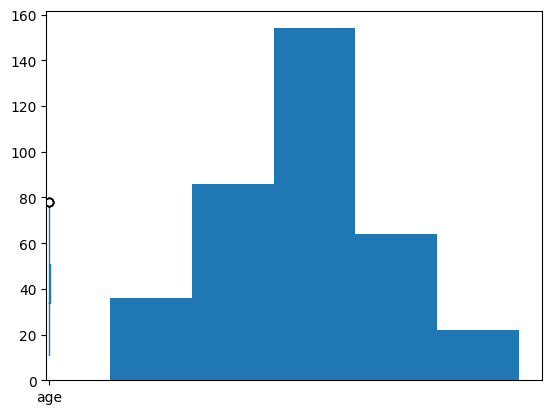

In [30]:
# Age: Treating outliers:
plt.hist(df.age, bins=5) # Normal distribution.
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lowerThreshold_age = Q1_age - (IQR_age * 1.5)
df['age'] = df['age'].mask(df['age'] < lowerThreshold_age, np.nan)
df['age'] = df['age'].fillna(value=df.age.mean()) # All NA values turned to mean.
df.boxplot(column=['age'], grid=False)
df.isnull().sum() # Checking nulls in the data frame.

In [31]:
#Normalizing:
age_normalized = stats.zscore(df['age'])
df['age_z'] = age_normalized

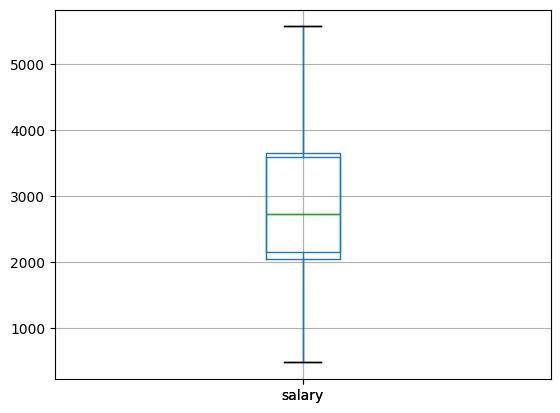

In [32]:
# Salary: Treating outliers:

Q1_sal = df['salary'].quantile(0.25)
Q3_sal = df['salary'].quantile(0.75)
IQR_sal = Q3_sal - Q1_sal
upperThreshold_salary = Q3_sal + (IQR_sal * 1.5)
df['salary'] = df['salary'].mask(df['salary'] > upperThreshold_salary, np.nan)
df.boxplot(column=['salary'], grid=True)
df['salary'] = df['salary'].fillna(value=df.salary.median()) # NA salary values replaced to median.
df.boxplot(column=['salary'], grid=True)
# Normalizing:
salary_normalized = stats.zscore(df['salary'])
df['salary_z'] = salary_normalized


In [33]:
#Volunteering:
volunteering_normalized = stats.zscore(df['volunteering'])
df['new_volunteering'] = volunteering_normalized


In [34]:
#Passtime:
df['passtime'].describe() # Most are fishing, I'll change two missing values to top.
df['passtime'].value_counts() # Fishing most common
df['passtime'] = df['passtime'].replace(to_replace=np.nan, value='fishing')
# Transform to numeric:
le_passtime = LabelEncoder()
le_passtime.fit(df['passtime'])
df['new_passtime'] = le_passtime.transform(df['passtime'])
df['new_passtime'].isna().sum() # No NA's.

np.int64(0)

In [35]:
#Status:
le_status = LabelEncoder()
le_status.fit(df['status'])
df['new_status'] = le_status.transform(df['status'])

In [36]:
#Vote:
le_vote = LabelEncoder()
le_vote.fit(df['vote'])
df['new_vote'] = le_vote.transform(df['vote'])

In [37]:
# Reearranging data in a new dataframe (df2):
df2 = df.drop(['sex','salary','volunteering','age', 'passtime', 'status', 'vote'], axis=1)

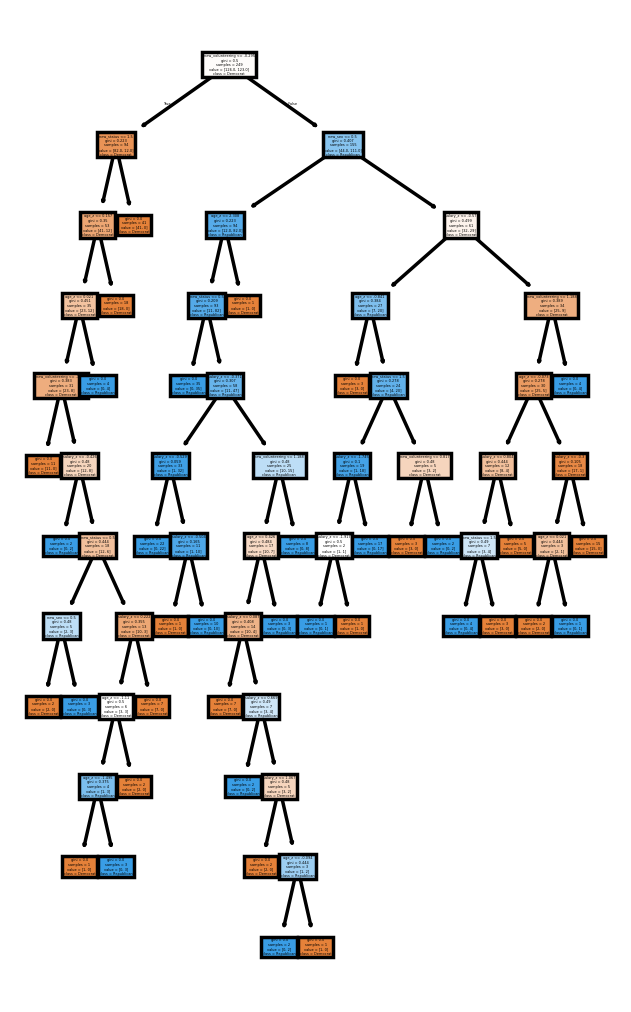

In [38]:
X = df2.drop(columns = ['new_vote'])
y = df2['new_vote']
X.head()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RSEED)
model = DecisionTreeClassifier(random_state=RSEED)
model.fit(X_train, y_train)
plt.figure(figsize=(3, 5), dpi=250)
plot_tree(model, filled=True, feature_names=X.columns, class_names= le_vote.inverse_transform(model.classes_))
plt.show()

In [39]:
y_pred_test = model.predict(X_test)
cm_test = pd.crosstab(y_test, y_pred_test, colnames=['pred'], margins=True)
print(cm_test) # Confusion matrix, 1 = Repub, 0 = Democ

pred       0   1  All
new_vote             
0         56   8   64
1         12  47   59
All       68  55  123


In [40]:
print("Test set results:") # Screening results:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision:", metrics.precision_score(y_test, y_pred_test))
print("recall:", metrics.recall_score(y_test, y_pred_test))

Test set results:
Accuracy: 0.8373983739837398
Precision: 0.8545454545454545
recall: 0.7966101694915254


In [41]:
y_pred_train = model.predict(X_train)
cm_train = pd.crosstab(y_train, y_pred_train, colnames=['pred'], margins=True)
print (cm_train)
print("Train set results:")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("recall:", metrics.recall_score(y_train, y_pred_train))

pred        0    1  All
new_vote               
0         126    0  126
1           0  123  123
All       126  123  249
Train set results:
Accuracy: 1.0
Precision: 1.0
recall: 1.0


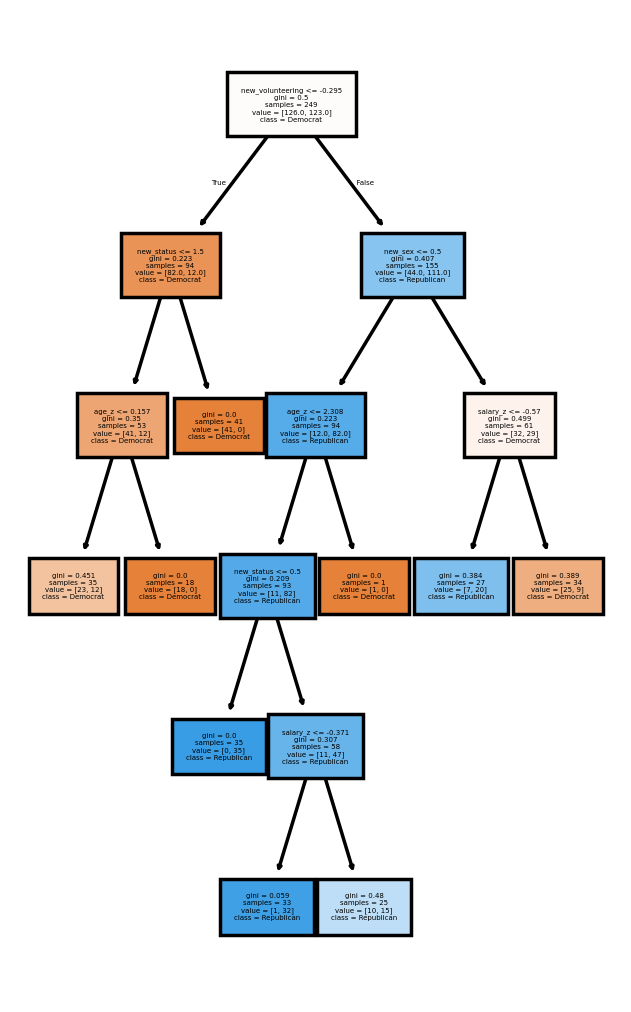

Value by target: 67    Republican
Name: vote, dtype: object
The predicted value is: [1] While 1 = Republican and 0 = Democrat


In [42]:
new_model = DecisionTreeClassifier(max_depth=5, min_samples_split=40, random_state=RSEED)
new_model.fit(X_train, y_train)
plt.figure(figsize=(3, 5), dpi=250)
plot_tree(new_model, filled=True,fontsize=2, feature_names=X.columns, class_names= le_vote.inverse_transform(model.classes_))
plt.show()
#Q8A The tree's depth 5
#Q8B it has 8 leaves.
#Q8C Status.
#Q8D Yes, passtime.
#Q8E They are the same :
y_pred = new_model.predict(X.loc[67:67, :])
print('Value by target:', df.loc[67:67, :]['vote'])
print('The predicted value is:', y_pred, 'While 1 = Republican and 0 = Democrat')

In [43]:
y_pred_test = new_model.predict(X_test)
new_cm_test = pd.crosstab(y_test, y_pred_test, colnames=['pred'], margins=True)
print(new_cm_test) # Confusion matrix, 1 = Repub, 0 = Democ

print("New test set results:") # Screening results:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision:", metrics.precision_score(y_test, y_pred_test))
print("recall:", metrics.recall_score(y_test, y_pred_test))

y_pred_train = new_model.predict(X_train)
new_cm_train = pd.crosstab(y_train, y_pred_train, colnames=['pred'], margins=True)
print (new_cm_train)
print("New train set results:")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("recall:", metrics.recall_score(y_train, y_pred_train))

pred       0   1  All
new_vote             
0         48  16   64
1         17  42   59
All       65  58  123
New test set results:
Accuracy: 0.7317073170731707
Precision: 0.7241379310344828
recall: 0.711864406779661
pred        0    1  All
new_vote               
0         108   18  126
1          21  102  123
All       129  120  249
New train set results:
Accuracy: 0.8433734939759037
Precision: 0.85
recall: 0.8292682926829268


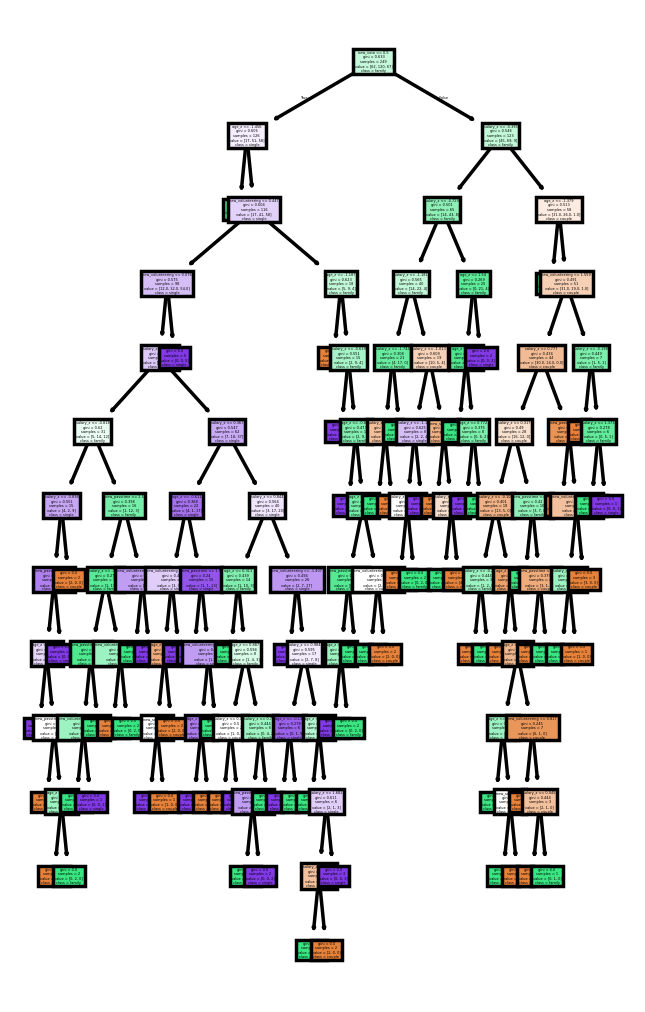

pred         0   1   2  All
new_status                 
0           18   4   6   28
1            3  59   8   70
2            2   4  19   25
All         23  67  33  123
Accuracy: 0.7804878048780488
pred         0    1   2  All
new_status                  
0           62    0   0   62
1            0  120   0  120
2            0    0  67   67
All         62  120  67  249
Accuracy: 1.0


In [44]:
X = df2.drop(columns = ['new_status'])
y = df2['new_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RSEED)
second_model = DecisionTreeClassifier(random_state=RSEED)
second_model.fit(X_train, y_train)
plt.figure(figsize=(3, 5), dpi=250)
plot_tree(second_model, filled=True, feature_names=X.columns, class_names= le_status.inverse_transform(second_model.classes_))
plt.show()
#Test's reults:
y_pred_test = second_model.predict(X_test)
second_cm_test = pd.crosstab(y_test, y_pred_test, colnames=['pred'], margins=True)
print(second_cm_test) # Second confusion matrix.
#Accuracy: Accuracy is 0.78
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

# Train's result:
y_pred_train = second_model.predict(X_train)
second_new_cm_test = pd.crosstab(y_train, y_pred_train, colnames=['pred'], margins=True)
print(second_new_cm_test) # Second confusion matrix.
#Accuracy: Accuracy is 1
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))

In [45]:
y_test_pred = second_model.predict(X_test)
cm3 = pd.crosstab(y_test, y_test_pred, colnames=['pred'], margins=True)

print('Precision:', (cm3.iloc[2, 2]) / (cm3.iloc[3, 2]))

Precision: 0.5757575757575758
